In [1]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from simple_convnet import SimpleConvNet
from common.trainer import Trainer

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 処理に時間のかかる場合はデータを削減 
x_train, t_train = x_train[:5000], t_train[:5000]
x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)

opti='SDprop'

trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer=opti, optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)

In [2]:
trainer.train()

train loss:2.2290297588431036
=== epoch:1, train acc:0.093, test acc:0.107 ===
train loss:2.1056298015304926
train loss:2.1395640901399204
train loss:1.8406000855626874
train loss:1.7640351958574667
train loss:1.7794435852448138
train loss:1.418485071562165
train loss:1.1989756681600376
train loss:0.8481160125757404
train loss:0.9425596425993684
train loss:1.3883940551000853
train loss:1.0294065220155761
train loss:0.7534112980885659
train loss:0.6120914747102292
train loss:0.6044372427675379
train loss:0.5423140553721651
train loss:0.5418230534759322
train loss:0.5647609721259347
train loss:0.6318216175712158
train loss:0.442276865173721
train loss:0.42019162543167965
train loss:0.44992663300196073
train loss:0.3754633746661149
train loss:0.45343880460170255
train loss:0.4171635875814487
train loss:0.4096839511892744
train loss:0.434144577597682
train loss:0.30289861025418036
train loss:0.3916440850198033
train loss:0.4104157855564112
train loss:0.2969309003151184
train loss:0.2809834

train loss:0.0834037452905457
train loss:0.028342653484536004
train loss:0.029035559661452204
train loss:0.03080181962659755
train loss:0.04019084242362595
train loss:0.023413308447201953
train loss:0.040181472105691576
train loss:0.03152111325893427
train loss:0.034929835189877904
train loss:0.023595812381442857
train loss:0.06684416833244845
train loss:0.02787449025704886
train loss:0.027268398463418074
train loss:0.05923361845301785
train loss:0.040486332542380724
train loss:0.03330984931054005
train loss:0.07830927328270111
train loss:0.069055987642517
train loss:0.031036212824040916
train loss:0.02538039020438545
train loss:0.0750573035868191
train loss:0.09504110389377253
train loss:0.02484696609598609
train loss:0.038711857574620735
train loss:0.03496941034199108
train loss:0.08343759375405266
train loss:0.01899676415680783
train loss:0.03209405343698121
train loss:0.04719158446071295
train loss:0.0810022379249641
train loss:0.02272687215079688
train loss:0.024002883638118106
tr

train loss:0.011624856065469515
train loss:0.011227099106117132
train loss:0.022061329946269446
train loss:0.02699369638009146
train loss:0.011505357339890547
train loss:0.013406257340273715
train loss:0.004520228007241924
train loss:0.01318387250360684
train loss:0.026036039667462707
train loss:0.009286831265398414
train loss:0.012078016309422507
train loss:0.005538186700660811
train loss:0.0059827317553026605
train loss:0.00745797443125174
train loss:0.008477854589446226
train loss:0.012097396818739933
train loss:0.02140765510242422
train loss:0.014709441746627732
train loss:0.015153344346336348
train loss:0.00915097151974832
train loss:0.006816172769892876
train loss:0.020233035806286662
train loss:0.008409132256703162
train loss:0.06316681846323624
train loss:0.018307084085363308
train loss:0.007497722475429598
train loss:0.011696180325805413
train loss:0.00878903368317993
train loss:0.004661281316512184
train loss:0.004719099128459996
train loss:0.009440769264679887
train loss:0.0

train loss:0.025445921459028856
train loss:0.006532060768972305
train loss:0.006082118751593055
train loss:0.0030999556277350455
train loss:0.004537842137540022
train loss:0.0016737116490004571
train loss:0.005566201162659715
train loss:0.001291628925504627
train loss:0.0036444574166606476
train loss:0.01248904720135149
train loss:0.0030131654829781847
train loss:0.0032287237270827536
train loss:0.004497379946698092
train loss:0.0036443862172334373
train loss:0.004219244271179937
train loss:0.006989657646880667
train loss:0.003562589027155573
train loss:0.0031256535227001166
train loss:0.0024325100970457873
train loss:0.00907263036406192
train loss:0.0030013476426737685
train loss:0.007302139178096887
train loss:0.001807916826067743
train loss:0.002821761653555346
train loss:0.0034251086885662353
train loss:0.0037647780182064844
train loss:0.0027140930654828742
train loss:0.001756392733648597
train loss:0.0009505158652937727
train loss:0.0035775169823001125
train loss:0.003028764955110

In [3]:
# パラメータの保存
network.save_params(opti + ".params.pkl")
print("Saved Network Parameters!")

Saved Network Parameters!


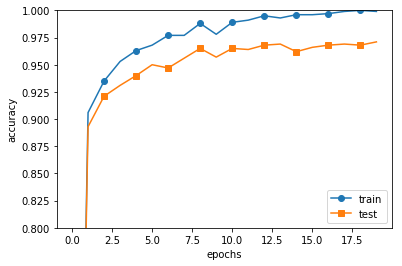

In [4]:
# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0.8, 1.0)
plt.legend(loc='lower right')
plt.show()

In [14]:
opti='RMSprop'

trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer=opti, optimizer_param={'lr': 0.01},
                  evaluate_sample_num_per_epoch=1000)

In [15]:
trainer.train()

train loss:12.94170995640842
=== epoch:1, train acc:0.139, test acc:0.127 ===
train loss:12.11196951278118
train loss:4.3254219253525745
train loss:1.470850997174835
train loss:1.1794172984815785
train loss:1.771761872084061
train loss:1.8173429578061797
train loss:0.6442922570543328
train loss:0.6425241823905687
train loss:0.29477522916376186
train loss:0.31001435936838156
train loss:0.15941572074962757
train loss:0.3279935160949838
train loss:0.17647696120690212
train loss:0.2106446820107845
train loss:0.19499236329746206
train loss:0.16446051119166544
train loss:0.17228939633804644
train loss:0.15294691797682394
train loss:0.11785754135605567
train loss:0.15118916103240254
train loss:0.11063534355323645
train loss:0.10436520365906743
train loss:0.11606101519998686
train loss:0.06701660362495447
train loss:0.0989370770349561
train loss:0.12136796598461867
train loss:0.06815000331761588
train loss:0.0834217555085401
train loss:0.1173924158797414
train loss:0.06572058569373626
train lo

train loss:0.005840344884075765
train loss:0.004925927021607774
train loss:0.008884597787731539
train loss:0.0045572663572985206
train loss:0.005383145997238195
train loss:0.0064644403584146306
train loss:0.005383572872500242
train loss:0.00845458377290172
train loss:0.006091046825701146
train loss:0.003270659524471875
train loss:0.008841594774362138
train loss:0.010018005745273055
train loss:0.007218282233967315
train loss:0.006688847097042693
train loss:0.018817777383251414
train loss:0.0050890749808219
train loss:0.008279538927433902
train loss:0.003213739109636578
train loss:0.002473037353773249
train loss:0.003305064394444406
train loss:0.005817843340590443
train loss:0.002975191308631981
train loss:0.003995847529218161
train loss:0.002388198155893248
train loss:0.0036293702961610833
train loss:0.00593221640808338
train loss:0.0034233836890216747
train loss:0.0036339796794254892
train loss:0.003896027765728834
train loss:0.004136046400762341
train loss:0.0036210809408535128
train 

=== epoch:11, train acc:1.0, test acc:0.964 ===
train loss:0.008688697572200406
train loss:0.005532050780942071
train loss:0.0007763629498108809
train loss:0.003180953316847498
train loss:0.0033077171090705065
train loss:0.0014838393134698105
train loss:0.0037172950709101127
train loss:0.0013787763011887883
train loss:0.0010042210181897694
train loss:0.0020391751609631264
train loss:0.0028514842271341653
train loss:0.002599266923578931
train loss:0.0019487666058912508
train loss:0.001874191369491942
train loss:0.0008395293398233203
train loss:0.0006287672890684099
train loss:0.0018219792637964702
train loss:0.002665111098088383
train loss:0.001851083431306107
train loss:0.0007835470890927859
train loss:0.001253151618387987
train loss:0.0012536141782151504
train loss:0.0015099561232412035
train loss:0.0012983029687800391
train loss:0.002321413045959735
train loss:0.001032649845743206
train loss:0.001611488385532817
train loss:0.0014365355450808544
train loss:0.0014732197642122011
train 

train loss:0.0004045448633793528
train loss:0.000721948706603099
train loss:0.0027302175775035407
train loss:0.001311614991102876
train loss:0.003385568835154525
train loss:0.12395480869355291
train loss:0.06728665407882603
=== epoch:16, train acc:0.935, test acc:0.909 ===
train loss:0.023690030928011713
train loss:0.039013628264277546
train loss:0.0015624040193561062
train loss:0.032651703171686815
train loss:0.0015385040435959454
train loss:0.005252675773355677
train loss:0.0015497248830898807
train loss:0.001075946039319153
train loss:0.0018312683715956514
train loss:0.001113073596764196
train loss:0.0020752257625319525
train loss:0.008967287711506162
train loss:0.0011274257428940144
train loss:0.0026109296977402507
train loss:0.0016773513725496683
train loss:0.0013790989343063038
train loss:0.001767954860952375
train loss:0.0010502489343552925
train loss:0.001397879197178221
train loss:0.0014410925296240965
train loss:0.01127339598317877
train loss:0.044843727779871154
train loss:0

train loss:0.00019024812350557546
train loss:0.0002704725784644826
train loss:0.0006122258879924613
train loss:0.00019540769972456275
train loss:0.00028857575184909227
train loss:1.815682466186539e-05
train loss:0.0002465547410413719
train loss:0.0004187716175946672
train loss:0.0006101593188117742
train loss:4.3945881380574766e-05
train loss:0.0001698254876885923
train loss:0.0002371880974331457
train loss:0.00019983637378507727
train loss:0.00013174292195470706
=============== Final Test Accuracy ===============
test acc:0.959


In [16]:
# パラメータの保存
network.save_params(opti + ".params.pkl")
print("Saved Network Parameters!")

Saved Network Parameters!


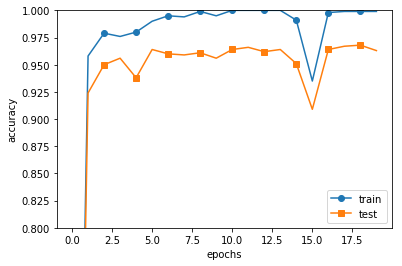

In [18]:
# グラフの描画
markers = {'train': 'o', 'test': 's'}
#plt.yscale("log")
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0.8, 1.0)
plt.legend(loc='lower right')
plt.show()

In [19]:
opti='Adam'

trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer=opti, optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)

In [20]:
trainer.train()

train loss:3.6264806414560884e-05
=== epoch:1, train acc:1.0, test acc:0.959 ===
train loss:3.0153050433062577e-05
train loss:0.0010544631585995808
train loss:0.000481964446187105
train loss:0.004617047541684658
train loss:0.000631368169142481
train loss:0.005349074160783895
train loss:0.00561817432812859
train loss:0.002095684226647088
train loss:0.0007635603250960051
train loss:0.000887978645273451
train loss:0.00014892040394973857
train loss:0.001741205973639997
train loss:0.0016228595658497034
train loss:0.00016172665059435387
train loss:4.358440577774313e-05
train loss:0.00015263576199286933
train loss:0.0009633925732183299
train loss:7.101885565090566e-05
train loss:0.00010827754577281775
train loss:0.0004027615812932813
train loss:4.194669249058599e-05
train loss:0.00011219458368906506
train loss:2.581274746510891e-05
train loss:0.0005180784443388183
train loss:0.013695506674552034
train loss:0.000753495752238554
train loss:0.0006259294888840003
train loss:0.00043329043206011877

train loss:6.179694816992337e-05
train loss:4.811895950801557e-05
train loss:5.64214939775329e-05
train loss:1.834633404032354e-05
train loss:1.1424885860206837e-05
train loss:4.862532936354827e-05
train loss:4.3738596604879e-05
train loss:3.052276731144662e-05
train loss:5.1491185538358635e-05
train loss:9.603575718553364e-05
train loss:6.578751834258531e-06
=== epoch:6, train acc:1.0, test acc:0.965 ===
train loss:0.00013790204057552313
train loss:5.819126324045836e-05
train loss:5.845749220053611e-05
train loss:5.0952857349689116e-05
train loss:1.4846883341374004e-05
train loss:4.6643647426126044e-05
train loss:5.8599152620314985e-05
train loss:1.4629906634386347e-06
train loss:3.7706541043801545e-05
train loss:1.4897695182961007e-05
train loss:5.738120469389363e-06
train loss:1.7160586310640712e-05
train loss:7.458810682381578e-06
train loss:2.3229254522846573e-05
train loss:6.259744457512535e-05
train loss:5.213015477132496e-05
train loss:7.88460854327345e-05
train loss:1.07045281

train loss:4.086347530019583e-05
train loss:1.0146746471779847e-05
train loss:6.570633524624986e-06
train loss:4.724261554904623e-05
train loss:8.329537054574014e-06
train loss:1.9993965921895823e-05
train loss:2.5413274667191378e-06
train loss:1.2861709748961147e-05
train loss:1.2850507211871064e-05
train loss:1.0104288665110387e-05
train loss:1.3121136716658099e-05
train loss:2.5786032075512466e-05
train loss:1.3039418931078985e-05
train loss:1.4014218726751798e-05
train loss:7.865471845175338e-06
train loss:1.0013741447660178e-05
train loss:9.633844067024797e-06
train loss:8.12941033573099e-06
train loss:1.532650010546989e-05
train loss:2.0955140511496456e-05
train loss:1.1401109496974035e-05
=== epoch:11, train acc:1.0, test acc:0.966 ===
train loss:1.1079209312012123e-05
train loss:2.0372007552437334e-05
train loss:1.6027378855283152e-06
train loss:3.188672808038935e-05
train loss:2.5705039176088245e-05
train loss:7.007599536393944e-06
train loss:1.5770529417174264e-05
train loss:

train loss:3.982059776897931e-06
train loss:4.7773769743667e-06
train loss:1.6110500652301436e-05
train loss:1.1002600684976017e-05
train loss:1.0390701562951027e-05
train loss:8.394504025701995e-06
train loss:1.141973456707808e-05
train loss:1.8527063328581834e-05
train loss:2.4194248572630018e-05
train loss:2.5423059586684187e-06
train loss:4.909043667206152e-06
train loss:3.3500168850159834e-06
train loss:4.981311933525165e-06
train loss:4.879823286368635e-06
train loss:1.621641952966914e-05
train loss:2.0094763914064714e-05
train loss:1.3985162249524216e-05
train loss:8.748060331390867e-06
train loss:1.6725089760151443e-05
train loss:4.211775466925632e-06
train loss:7.0194998606615025e-06
train loss:5.233682890438761e-06
train loss:6.219147440118071e-06
train loss:1.751661880990069e-06
train loss:4.743348219038021e-06
train loss:5.148367149938354e-06
train loss:1.3673465425312082e-05
train loss:8.047664118598791e-06
train loss:5.523731298288445e-06
train loss:4.4763082468206185e-06

train loss:7.744396009395427e-06
train loss:9.832518434487336e-06
train loss:4.799923268120939e-06
train loss:4.164992811965162e-06
train loss:5.82117112927757e-06
train loss:3.350284555222888e-06
train loss:1.8272353570680694e-06
train loss:1.9170227911079173e-06
train loss:2.098503830194951e-06
train loss:1.5570080482379494e-05
train loss:4.442171053602329e-06
train loss:5.196792061724088e-07
train loss:1.140842447988783e-05
train loss:4.454057834827722e-06
train loss:3.4976880126866474e-06
train loss:3.1966954388458763e-06
train loss:6.831916357974091e-06
train loss:5.236698444665769e-06
train loss:2.4983928704428177e-06
train loss:7.938885015373082e-06
train loss:5.486789733566624e-07
train loss:3.869131958605279e-07
train loss:1.2285420077583873e-06
train loss:1.1383460085001401e-06
train loss:2.7936703371507764e-06
train loss:8.027752498564895e-06
train loss:1.3719788841299014e-05
train loss:1.6761844561938258e-06
train loss:3.315984476546445e-06
train loss:1.3461308535333128e-05

In [21]:
# パラメータの保存
network.save_params(opti + ".params.pkl")
print("Saved Network Parameters!")


Saved Network Parameters!


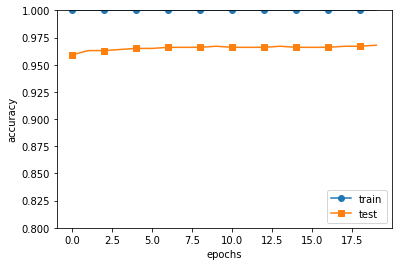

In [22]:
# グラフの描画
markers = {'train': 'o', 'test': 's'}
#plt.yscale("log")
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0.8, 1.0)
plt.legend(loc='lower right')
plt.show()